<h2>Operations on the Unit Circle</h2>

[Watch Lecture](https://youtu.be/FDn7cMimNAU)

_We use certain tools from python library "<b>matplotlib.pyplot</b>" for drawing. Check the notebook [Python: Drawing](../python/Python06_Drawing.ipynb) for the list of these tools._

<h3>Scenario 1</h3>

We start with drawing the quantum states $ \ket{0} $ and $ \ket{+} = \myvector{ \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} } $.

<i style="font-size:10pt;">
Our predefined function "draw_qubit()" draws a figure, the origin, the axes, the unit circle, and base quantum states.
<br>
Our predefined function "draw_quantum_state(x,y,name)" draws an arrow from (0,0) to (x,y) and associates it with <u>name</u>.
<br>
We include our predefined functions with the following line of code:
    
    %run qlatvia.py
</i>   

Text(0.21, 0.09, 'π/4')

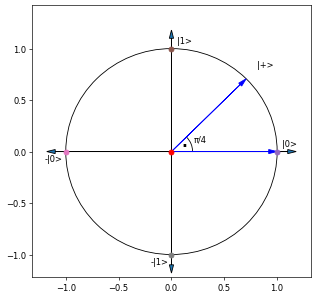

In [9]:
%run qlatvia.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(1,0,"")

draw_quantum_state(1/sqrttwo,1/sqrttwo,"|+>")

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=0,theta2=45) )
text(0.08,0.05,'.',fontsize=30)
text(0.21,0.09,'\u03C0/4')

<h3> Task 1 (Discussion) </h3>

When starting in the state $ \ket{0} $, we apply a quantum operator, say $ M $, then we obtain the state $\ket{+}$.

If we apply the operator $ M $ once more, what can be the next state?

How can we classify possible $ M $'s geometrically? How can we parameterize each possible $ M $?

<h3>Scenario 2</h3>

We draw the quantum states $ \ket{1} $ and $ \ket{-} = \stateminus $.

Text(0.21, 0.09, '3π/4')

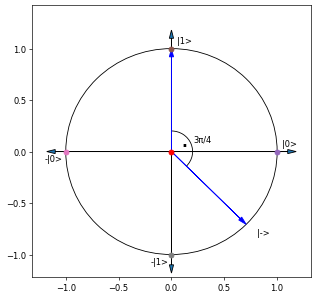

In [10]:
%run qlatvia.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(0,1,"")

draw_quantum_state(1/sqrttwo,-1/sqrttwo,"|->")

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=-45,theta2=90) )
text(0.08,0.05,'.',fontsize=30)
text(0.21,0.09,'3\u03C0/4')

<h3> Task 2 (Discussion) </h3>

When starting in the state $ \ket{1} $, we apply a quantum operator, say $ M $, then we obtain the state $\ket{-}$.

If we apply the operator $ M $ again, what can be the next state?

How can we parameterize each possible $ M $?

<hr>
<h3>Initialize a (real-valued) qubit with an arbitrary state</h3>

A qubit is set to the state $\ket{0}$ at the beginning.

Any real-valued quantum state is a point in the unit circle, and it can be described by an angle, say $\theta$:

For $ \theta \in [0,2\pi) $, the quantum state is $ \ket{v} = \myvector{\cos \theta \\ \sin \theta} $.

We can set the qubit to the state $ \ket{v} $ by using a rotation operator between $ \ket{0} $ and $ \ket{1} $ with angle $ \theta $.

<h3>Rotations with ry-gate</h3>

In Qiskit, the ry-gate can be used for the rotations on the unit circle.

The default direction of a rotation by ry-gate is counterclockwise. It is used as follows:

    quantum_circuit.ry(2 * angle_of_rotation,qubit)

_*Technical remark:* ry-gate is defined on [Bloch sphere](https://en.wikipedia.org/wiki/Bloch_sphere). The states $ \ket{0} $ and $ \ket{1} $ are placed on the poles of Bloch sphere, and so the angle between them is $ \pi $ on Bloch sphere. On the other hand, the angles between the states $ \ket{0} $ and $ \ket{1} $ on the unit circle is $ \frac{\pi}{2} $. Therefore, when using ry-gate, we provide twice of $ \theta $ for a rotation with angle $\theta$ on the unit circle._

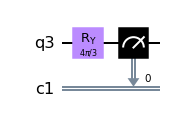

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import pi

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# angle of rotation in radian
rotation_angle = 2*pi/3

# rotate the qubit with rotation_angle
qc.ry(2*rotation_angle,q[0]) 

# measure the qubit
qc.measure(q,c)

# draw the circuit
qc.draw(output='mpl')

{'0': 252, '1': 748}


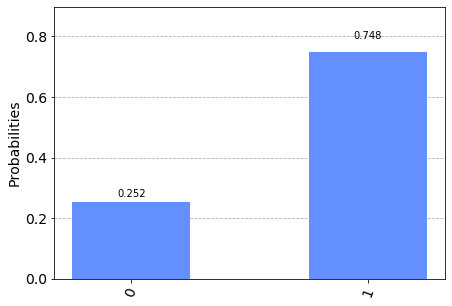

In [12]:
# execute the program 1000 times
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)

# print the results
counts = job.result().get_counts(qc)
print(counts)

# draw the histogram
plot_histogram(counts)

In [13]:
from math import sin,cos

# the quantum state
quantum_state = [ cos(rotation_angle) , sin (rotation_angle) ]
print("The quantum state is",round(quantum_state[0],4),"|0> +",round(quantum_state[1],4),"|1>")

the_expected_number_of_zeros = 1000*cos(rotation_angle)**2
the_expected_number_of_ones = 1000*sin(rotation_angle)**2

# expected results
print("The expected value of observing '0' is",round(the_expected_number_of_zeros,4))
print("The expected value of observing '1' is",round(the_expected_number_of_ones,4))

The quantum state is -0.5 |0> + 0.866 |1>
The expected value of observing '0' is 250.0
The expected value of observing '1' is 750.0


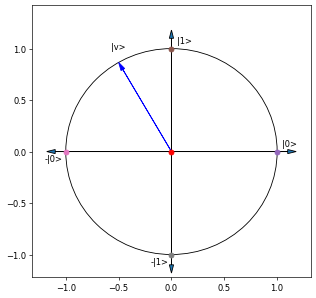

In [14]:
# draw the quantum state

%run qlatvia.py

draw_qubit()

draw_quantum_state(quantum_state[0],quantum_state[1],"|v>")

<h3> Task 3</h3>

Randomly pick an angle $ \theta \in [0,2\pi) $.

Suppose that we have 1000 copies of quantum state $ \ket{v} = \myvector{ \cos \theta \\ \sin \theta } $ and we measure each of them.

What are the expected numbers of observing the states 0 and 1?

Implement the above experiment by designing a quantum circuit and set the quantum state by using ry-gate.

Compare your experimental and analytic results.

Repeat the task a couple of times.

In [15]:
#
# your code is here
#
from random import randrange
from math import sin,cos, pi

# randomly pick an angle
random_angle = randrange(360)
print("random angle is",random_angle)

# pick angle in radian
rotation_angle = random_angle/360*2*pi

# the quantum state
quantum_state = [ cos(rotation_angle) , sin (rotation_angle) ]

the_expected_number_of_zeros = 1000*cos(rotation_angle)**2
the_expected_number_of_ones = 1000*sin(rotation_angle)**2

# expected results
print("The expected value of observing '0' is",round(the_expected_number_of_zeros,4))
print("The expected value of observing '1' is",round(the_expected_number_of_ones,4))

random angle is 235
The expected value of observing '0' is 328.9899
The expected value of observing '1' is 671.0101


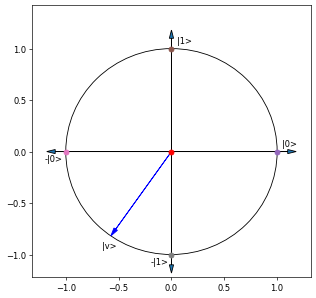

In [16]:
# draw the quantum state

%run qlatvia.py

draw_qubit()

draw_quantum_state(quantum_state[0],quantum_state[1],"|v>")

**Experimental results**

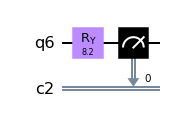

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# rotate the qubit with rotation_angle
qc.ry(2*rotation_angle,q[0]) 

# measure the qubit
qc.measure(q,c)

# draw the circuit
qc.draw(output='mpl')

{'0': 322, '1': 678}


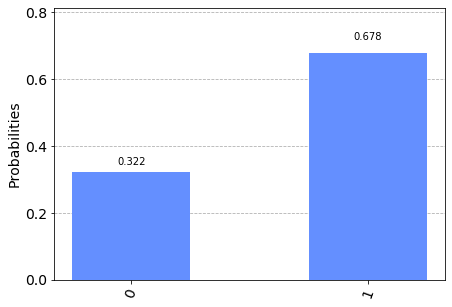

In [18]:
# execute the program 1000 times
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)

# print the results
counts = job.result().get_counts(qc)
print(counts)

the_observed_number_of_ones = 0
if '1' in counts:
    the_observed_number_of_ones= counts['1']

# draw the histogram
plot_histogram(counts)

**Compare the results**

In [19]:
difference = abs(the_expected_number_of_ones - the_observed_number_of_ones)
print("The expected number of ones is",the_expected_number_of_ones)
print("The observed number of ones is",the_observed_number_of_ones)
print("The difference is",difference)
print("The difference in percentage is",difference/100,"%")

The expected number of ones is 671.010071662834
The observed number of ones is 678
The difference is 6.98992833716602
The difference in percentage is 0.06989928337166021 %
